In [1]:
from collections import deque
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
from tqdm import tqdm
%matplotlib inline

COLUMN_WIDTH = 3.25  # Inches
TEXT_WIDTH = 6.299213  # Inches
GOLDEN_RATIO = 1.61803398875
DPI = 300
FONT_SIZE = 8

# mpl.rcParams['font.size'] = FONT_SIZE
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Times']
# # mpl.rcParams['text.usetex'] = True

# mpl.rcParams['text.usetex'] = False
from models import BetaBernoulli

In [2]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
    'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
    'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
    'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
    'willow_tree', 'wolf', 'woman', 'worm']

superclass_names = ['aquatic_mammals', 'fish', 'flowers', 'food_containers',
    'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects',
    'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes',
    'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people',
    'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

superclass_to_class = {
    'aquatic_mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food_containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit_and_vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household_electrical_devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household_furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large_carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large_man-made_outdoor_things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large_natural_outdoor_scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large_omnivores_and_herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium_mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect_invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small_mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles_1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles_2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}



class_idx = {s: i for i, s in enumerate(class_names)}
superclass_idx = {s: i for i, s in enumerate(superclass_names)}
superclass_lookup = {}
for superclass, class_list in superclass_to_class.items():
    for _class in class_list:
        superclass_lookup[class_idx[_class]] = superclass_idx[superclass]

new_idx = []
for superclass_name in superclass_to_class:
    for class_name in superclass_to_class[superclass_name]:
        new_idx.append(class_idx[class_name])
new_idx = np.array(new_idx)
new_idx

array([ 4, 30, 55, 72, 95,  1, 32, 67, 73, 91, 54, 62, 70, 82, 92,  9, 10,
       16, 28, 61,  0, 51, 53, 57, 83, 22, 39, 40, 86, 87,  5, 20, 25, 84,
       94,  6,  7, 14, 18, 24,  3, 42, 43, 88, 97, 12, 17, 37, 68, 76, 23,
       33, 49, 60, 71, 15, 19, 21, 31, 38, 34, 63, 64, 66, 75, 26, 45, 77,
       79, 99,  2, 11, 35, 46, 98, 27, 29, 44, 78, 93, 36, 50, 65, 74, 80,
       47, 52, 56, 59, 96,  8, 13, 48, 58, 90, 41, 69, 81, 85, 89])

In [9]:
DATAPATH = '../output/cost_result_matrices/cifar100_superclass_full/'

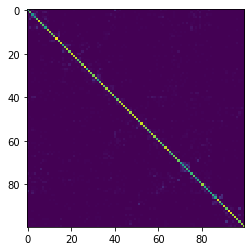

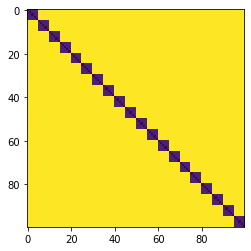

In [11]:
plt.imshow(np.load(DATAPATH + 'confusion_probs.npy')[:, new_idx][new_idx, :])
plt.show()
plt.imshow(np.load(DATAPATH + 'costs.npy')[:, new_idx][new_idx, :].T)
plt.savefig("../figures/cost/cost_superclass.pdf")

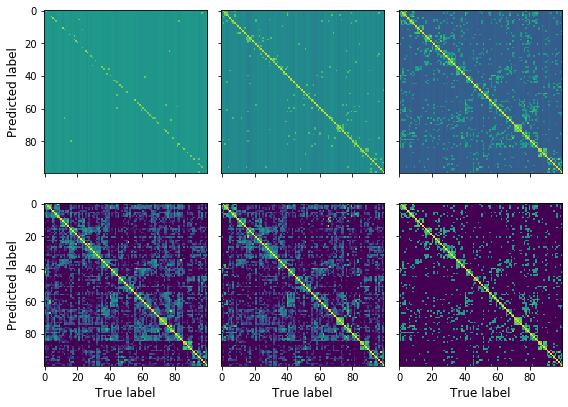

In [13]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(2,3,sharey=True, sharex=True)
fig.set_size_inches(8, 6)
for idx, method_name in enumerate(['random','active_informed']):
    matrices = (np.load(DATAPATH + '%s_confusion_log.npy' % method_name)[:, new_idx, :][:, :, new_idx])
    if method_name == 'active_informed':
        prior = (np.load(DATAPATH + 'informed_prior.npy'))[new_idx, :][:, new_idx]
    else:
        prior = np.ones((100,100))* 1./10
    for (i, num_samples) in enumerate([9, 99, 999]):
        matrix = matrices[num_samples] + prior
        matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
        cs = ax[idx][i].imshow(np.log(matrix).T, vmin=-10, vmax=0)
        if i == 0:
            ax[idx][i].set_ylabel("Predicted label", fontsize=12)
        if idx == 1:
            ax[idx][i].set_xlabel("True label", fontsize=12)
plt.tight_layout()

In [15]:
fig.savefig('../figures/cost/confuson_matrix.pdf')

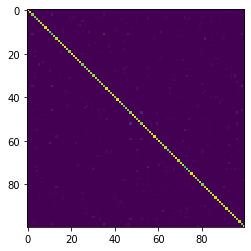

In [16]:
plt.imshow(np.load(DATAPATH + 'informed_prior.npy'))